In [20]:
import gym
import random

In [33]:
list(range(3))

[0, 1, 2]

In [47]:
from PIL import Image
import requests
from io import BytesIO

In [48]:
url = 'https://mblogthumb-phinf.pstatic.net/MjAxOTEyMTJfMjYw/MDAxNTc2MTQwMDE0MjIy.F1V39cfeZPhX87yFFlqkZQqfGmycVOxXbO3vg0dFrvEg.12ulcNAMUNyNzlE7rz5Hk2NVlJfkakVTOspDnzyRkUMg.PNG.vet6390/%EA%B8%B8%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9E%85%EC%96%91.PNG?type=w800'
            

In [49]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

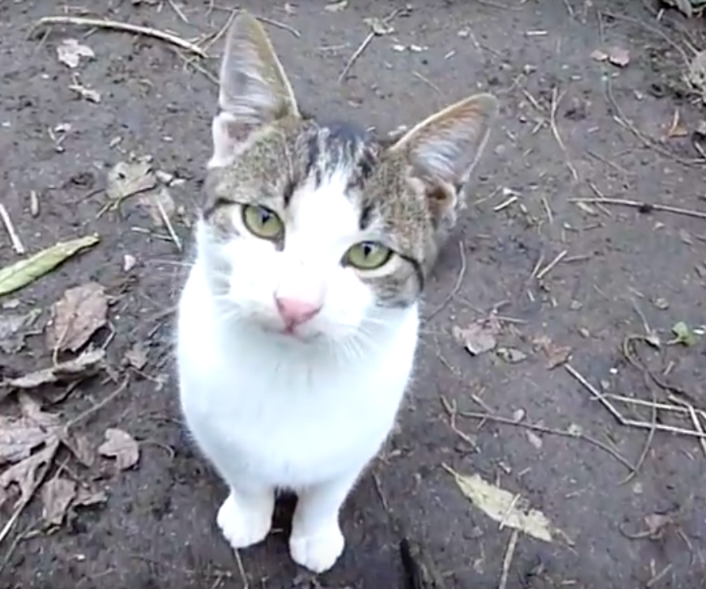

In [50]:
img

In [42]:
class MyEnv:
    
    def __init__(self):
        self.n_step = 2
        self.image_url = [
            'https://mblogthumb-phinf.pstatic.net/MjAxOTEyMTJfMjYw/MDAxNTc2MTQwMDE0MjIy.F1V39cfeZPhX87yFFlqkZQqfGmycVOxXbO3vg0dFrvEg.12ulcNAMUNyNzlE7rz5Hk2NVlJfkakVTOspDnzyRkUMg.PNG.vet6390/%EA%B8%B8%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9E%85%EC%96%91.PNG?type=w800',
            'https://mblogthumb-phinf.pstatic.net/MjAxOTEyMTJfMjYw/MDAxNTc2MTQwMDE0MjIy.F1V39cfeZPhX87yFFlqkZQqfGmycVOxXbO3vg0dFrvEg.12ulcNAMUNyNzlE7rz5Hk2NVlJfkakVTOspDnzyRkUMg.PNG.vet6390/%EA%B8%B8%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9E%85%EC%96%91.PNG?type=w800',
            'https://mblogthumb-phinf.pstatic.net/MjAxOTEyMTJfMjYw/MDAxNTc2MTQwMDE0MjIy.F1V39cfeZPhX87yFFlqkZQqfGmycVOxXbO3vg0dFrvEg.12ulcNAMUNyNzlE7rz5Hk2NVlJfkakVTOspDnzyRkUMg.PNG.vet6390/%EA%B8%B8%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%9E%85%EC%96%91.PNG?type=w800',
        ]
        self.utternces = ["안녕", "모해?", "내일 비와?"]
        self.observation_space = [{"img": self.image_url[i], "text":self.utternces[i]}for i in range(3)]
    
    def sample(self):
        return random.choice(self.observation_space)
    
    def reset(self):
        obs = "안녕"
        return obs
    
    def step(self, action):
        obs = self.sample()
        reward = None
        self.n_step -= 1
        if self.n_step == 0:
            done = True
        else:
            done = False
        info = None
        return obs, reward, done, info

In [43]:
class MyAgent:
    
    def __init__(self):
        self.action_spaces = ["안녕하세요!", "TV 봐요", "모르겠어요"]

    def sample(self):
        return random.choice(self.action_spaces)

    
    def act(self,obs):
        #feat = self.trans_w2v(obs)
        action = self.sample()
        return action

In [52]:
if __name__ == "__main__":
    #env = RandomActionWrapper(gym.make("CartPole-v0"))
    env = MyEnv() #gym.make("CartPole-v0")
    agent = MyAgent()
    
    obs = env.reset()
    print("나 : ", obs)
    total_reward = 0.0

    while True:
        action = agent.act(obs)
        print("챗봇 : ", action)
        obs, reward, done, _ = env.step(action)
        print("나 : ", obs['text'])

        
    #print(reward)
    #print(done)
    #print(info)
    #    total_reward += reward
        if done:
            break

    print("Reward got: %.2f" % total_reward)


나 :  안녕
챗봇 :  TV 봐요
나 :  안녕
챗봇 :  안녕하세요!
나 :  안녕
Reward got: 0.00
